In [1]:
#importing libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading the data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [24]:
top_countries = df["job_country"].value_counts().head(10).index
filtered_df = df[df["job_country"].isin(top_countries)]

type(filtered_df)

pandas.core.frame.DataFrame

In [38]:
df_job_country_salary =filtered_df.pivot_table(index="job_country", columns="job_title_short",values="salary_year_avg",aggfunc="median")
df_job_country_salary = df_job_country_salary.loc[top_countries]
job = ["Data Analyst","Data Scientist","Business Analyst","Data Engineer"]
df_job_country_salary = df_job_country_salary[job]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Singapore'),
  Text(7, 0, 'Sudan'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Italy')])

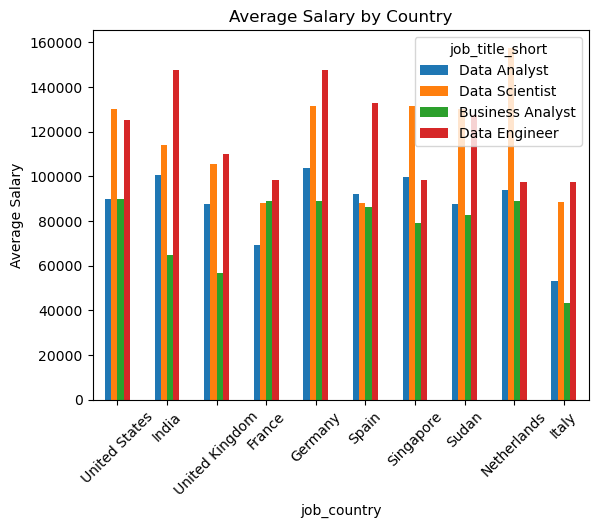

In [43]:
df_job_country_salary.plot(kind="bar")
plt.title("Average Salary by Country")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)